In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# Load the takehome_users file
user_df = pd.read_csv('takehome_users.csv', encoding='iso-8859-1')

In [208]:
user_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [209]:
# Load the takehome_user_engagement file
usage_df = pd.read_csv('takehome_user_engagement.csv')

In [210]:
usage_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [211]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [212]:
# Create a new datafram considering the user_id who logs more than three times
usage_g3 = usage_df[usage_df.groupby('user_id')['time_stamp'].transform('count') >= 3]
usage_g3

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
...,...,...,...
207905,2014-04-20 14:22:45,11991,1
207906,2014-04-25 14:22:45,11991,1
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1


In [213]:
# Conver the type of time_stamp column from object to datetime
usage_g3['time_stamp'] = pd.to_datetime(usage_g3['time_stamp'])
# Set time_stamp column as an index of type DatetimeIndex
usage_g3 = usage_g3.set_index('time_stamp')
usage_g3.head()

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,visited
time_stamp,,
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1


In [214]:
# make a list from unique user_ids
unique_userid = usage_g3['user_id'].unique()
unique_userid

array([    2,    10,    20, ..., 11981, 11988, 11991])

In [215]:
# Create a function to determine if user_id is an adopted user or not
def identify_adopted_user(series):
    # Create a new dataframe with login count within 7 days duration
    usage_g3_df_agg7 = pd.DataFrame({'count' : series.time_stamp.resample('7d').count()})
    return usage_g3_df_agg7['count'].between(3, 7, inclusive=True).any()

In [216]:
adopted_user_stats = [identify_adopted_user(usage_g3.groupby('user_id').get_group(x).index.to_frame(index=True)) for x in unique_userid]

In [217]:
# Create new dataframe with unique user_id (rename it 'object_id' for merging step) and status of adopted user 
user_adoption_df = pd.DataFrame({'object_id': unique_userid, 'adopted_status':adopted_user_stats})
user_adoption_df.head()

,object_id,adopted_status
0,2,True
1,10,True
2,20,True
3,33,False
4,42,True


## Merge two dataframe to identify which factors predict future user adoption.

In [218]:
#merging user_df and user_adoption_df dataframes  
complete_df = pd.merge(user_df, user_adoption_df, left_on='object_id', right_on='object_id', how = 'inner')
complete_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_status
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,True
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,False
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
2243,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,True
2244,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,1.397835e+09,0,0,406,3068.0,False
2245,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,1.364868e+09,0,0,110,5775.0,False
2246,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,True


Considering that the user_id with login counts less than 3 do not considered in above analysis, they are not categorized as adopted user. Therefore, their 'adopted_status' values should be false.

In [219]:
# fill the null values
complete_df['adopted_status'] = complete_df['adopted_status'].fillna(False)
complete_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_status
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,True
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,False
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
2243,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,True
2244,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,1.397835e+09,0,0,406,3068.0,False
2245,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,1.364868e+09,0,0,110,5775.0,False
2246,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,True


### Which factors predict future user adoption?

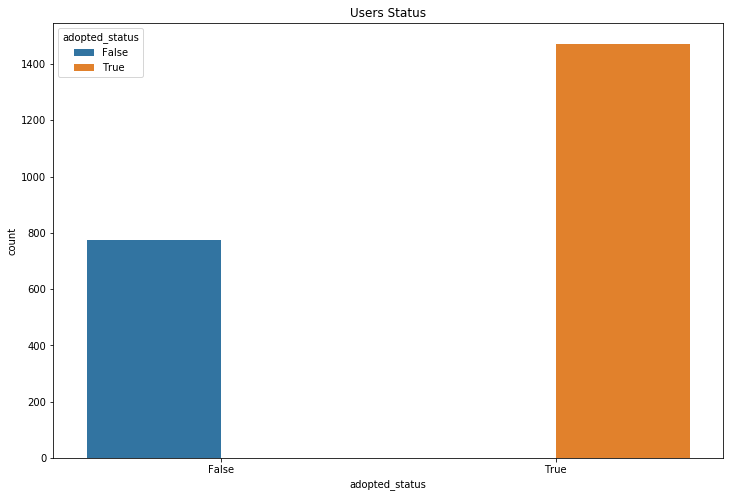

In [220]:
plt.figure(figsize = (12, 8))
sns.countplot(x='adopted_status', data= complete_df, hue='adopted_status')
plt.title("Users Status")
plt.show()

In [221]:
complete_df['adopted_status'].value_counts(normalize=True)

True     0.654804
False    0.345196
Name: adopted_status, dtype: float64

65% of users are categorized as adopted user which mean that their user satisfaction strategy works.

Lets see how creation_source influence on user activation.

In [222]:
complete_df.groupby('creation_source')['adopted_status'].value_counts(normalize=True)

creation_source     adopted_status
GUEST_INVITE        True              0.661355
                    False             0.338645
ORG_INVITE          True              0.643678
                    False             0.356322
PERSONAL_PROJECTS   True              0.623377
                    False             0.376623
SIGNUP              True              0.657895
                    False             0.342105
SIGNUP_GOOGLE_AUTH  True              0.691083
                    False             0.308917
Name: adopted_status, dtype: float64

Above summary indicates that all creation_source has a same effect on user activation. 

In [223]:
complete_df.groupby('opted_in_to_mailing_list')['adopted_status'].value_counts(normalize=True)

opted_in_to_mailing_list  adopted_status
0                         True              0.650898
                          False             0.349102
1                         True              0.666090
                          False             0.333910
Name: adopted_status, dtype: float64

They should change their marketing strategy, since it does not incrase selecting user logins.

In [224]:
complete_df.groupby('enabled_for_marketing_drip')['adopted_status'].value_counts(normalize=True)

enabled_for_marketing_drip  adopted_status
0                           True              0.655263
                            False             0.344737
1                           True              0.652299
                            False             0.347701
Name: adopted_status, dtype: float64

In [225]:
complete_df.groupby('org_id')['adopted_status'].value_counts().sort_values(ascending=False) 

org_id  adopted_status
7       True              16
4       True              14
9       True              14
2       True              14
3       True              14
                          ..
197     False              1
        True               1
354     True               1
68      False              1
322     True               1
Name: adopted_status, Length: 730, dtype: int64

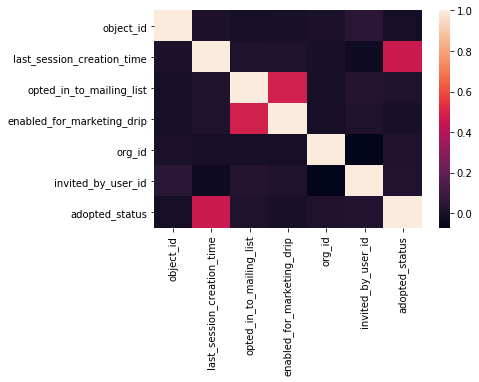

In [226]:
sns.heatmap(complete_df.corr())

The correlation matrix of features shows that there is only medium correlation between 'last_session_creation_time' and 'adopted_status'.